# Desafio2 Expansiones Basales
## Daniela Hurtado

__Descripción__

* Una aplicación interesante de los modelos predictivos es poder predecir propiedades de materiales compuestos a partir de diferentes combinaciones en el proceso y creación de estos.

* Para este desafío trabajaremos con un dataset que contiene diferentes medidas de materiales con los que se hace la mezcla de concreto.

* Nuestra tarea será utilizar estas medidas para predecir la capacidad de resistir fuerzas compresivas de vigas de concreto, a esta capacidad de soportar fuerzas que buscan reducir la superficie o volumen de un cuerpo se le conoce como fuerza compresiva.

## Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos clásicos del trabajo en ciencia de datos.
* El archivo tiene el nombre compresive_strength_concrete.csv . Impórtelo y genere estadísticas descriptivas.
* En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .

In [1]:
# realizamos los principales imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
plt.style.use('seaborn')

#importamos pygam para hacer un modelo aditivo generalizado
import pygam
from pygam import LinearGAM
# mediante generate_X_grid generamos un array que contenga los valores de cada atributo
from pygam.utils import generate_X_grid

# importamos los módulos de preprocesamiento y división de muestras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# metricas de desempeño
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

In [2]:
# importamos nuestra base de datos
df = pd.read_csv('compresive_strength_concrete.csv')

In [3]:
# Inspeccionamos el tipo de dato y los nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# Inspeccionamos las 5 primeras filas
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# Estadísticas descriptivas
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Ejercicio 2: Descripción

* El vector objetivo tiene el nombre de Concrete compressive strength(MPa, megapascals).
* Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice iloc.
* Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [6]:
# Inspeccionamos las columnas para poder hacer rename más abajo
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
# Hacemos rename para reemplazar los espacion vacíos por un '_'
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Blast_Furnace_Slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)': 'Fly_Ash',
                        'Water  (component 4)(kg in a m^3 mixture)':'Water',
                        'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer',
                        'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse_Aggregate',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
                        'Age (day)':'Age',
                        'Concrete compressive strength(MPa, megapascals) ':'Concrete_compressive_strength'})
                        

In [8]:
# Comprobamos el cambio del nombre de las columnas
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength'],
      dtype='object')

In [9]:
#instanciamos nuestro scaler
scaler = StandardScaler()
#estandarizamos nuestros datos
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

## Ejercicio 3: Modelo

* En base al vector objetivo, decida el mejor modelo e impórtelo con pygam . Condicional a ésto, importe las métricas de desempeño asociadas.
* Genere conjuntos de entrenamiento y validación.
Genere un primer modelo sin implementar la función gridsearch . Repórte el
hiperparámetro lam así como las métricas de desempeño asociadas.
* Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

#### Modelo sin gridsearch

In [10]:
# X será nuestro conjunto de atributos e y será nuetra variable objetivo
X = df_scaled.loc[:,'Cement':'Age'] # Tomamos todas las columnas menos la primera(price)
N = X.shape[0] # guardamos el número de filas (datos de entrenamiento)
y = df_scaled['Concrete_compressive_strength'] # asignamos como target la variable 'Concrete_compressive_strength'

#Separamos los subsets de test y train
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)

In [11]:
# Iniciamos nuestro modelo sin gridsearch
gam1 = LinearGAM().fit(X_train, y_train)

C:\Users\Victor\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


In [12]:
# Hiperparámetro lam con gam1
gam1.lam

0.6

In [23]:
def report(model, X_test, y_test):
    print('R2 :', r2_score(y_test, model.predict(X_test)))
    print('MSE:', mean_squared_error(y_test, model.predict(X_test)))
    print('MAE:', median_absolute_error(y_test, model.predict(X_test)))

In [24]:
# Reporte de las metricas para gam1
report(gam1, X_test, y_test)

R2 : 0.8971884874446032
MSE: 0.0965089136231218
MAE: 0.21616734482329014


#### Modelo con gridsearch

In [15]:
# definimos el rango de hiperparámetros a evaluar
search_params = {'lam': np.logspace(-3, 3, 11)}

In [16]:
# Creamos el modelo, lo entrenamos y buscamos los hiperparámetros mediante gridsearch
gam2= LinearGAM().gridsearch(X_train, y_train, **search_params)## ** para trabajar con argumentos de palabras

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\Victor\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01C:\Users\Victor\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:01C:\Users\Victor\Anaconda3

In [17]:
# Hiperparametro lam con gam2
gam2.lam

0.25118864315095796

In [25]:
# Reporte de las métricas de desempeño para gam2
report(gam2, X_test, y_test)

R2 : 0.8975861898989643
MSE: 0.09613559130870726
MAE: 0.2088648692015347


## Ejercicio 4: Dependencia Parcial

* En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
* Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
* Reporte brevemente sobre qué atributos están asociados a mayores y menores niveles de resistencia.

_En base a las métricas de desempeño el mejor modelo es el que incluye gridsearch (gam2)_

C:\Users\Victor\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


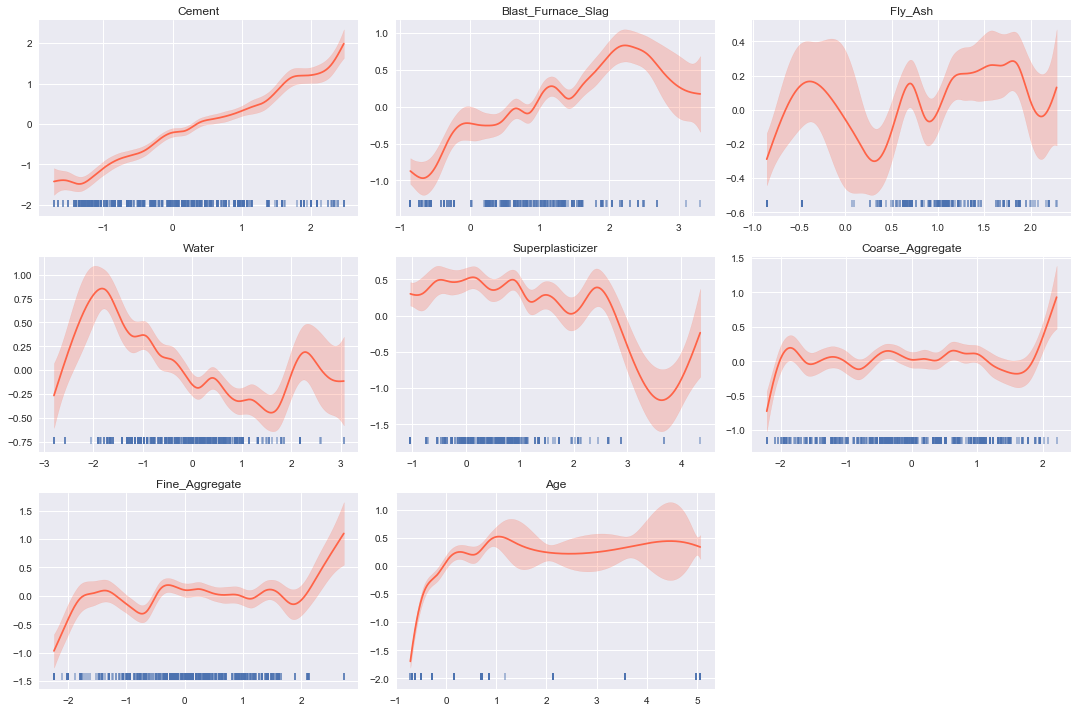

In [19]:
x_grid = generate_X_grid(gam2)
attribute = X_train.columns

# generamos el dimensionado del grid en base a la cantidad de atributos
cols = 3; rows = np.ceil(len(attribute) / cols)

plt.figure(figsize=(15,10))
# para cada atributo
for i, n in enumerate(range(len(attribute))):
    plt.subplot(rows, cols, i + 1)
    # extraemos la dependencia parcial y sus intervalos de confianza al 95%
    partial_dep, confidence_intervals = gam2.partial_dependence(x_grid, feature = i + 1, width=0.95)
    # Visualizamos la recta
    plt.plot(x_grid[:, n], partial_dep, color='tomato')
    # Generamos una visualización de los intervalos de confianza
    plt.fill_between(x_grid[:, n],
                    confidence_intervals[0][:, 0], # intervalo inferior
                    confidence_intervals[0][:, 1], # intervalo superior
                    color='tomato', alpha=.25) # color y opacidad
    # agregamos el nombre del atributo
    plt.title(attribute[n])
    plt.scatter(X_train[attribute[n]], #accedemos a c/u de los atributos
               [plt.ylim()[0]] * len(X_train[attribute[n]]), #posicionamos una alfombra abajo de c/u de los elementos
               marker = '|', alpha = .5) 
plt.tight_layout()

Los atributos asociados a mayores niveles de resistencia tienen que ver con : Cement y Blast_Furnace_Slag mayormente, y los asociados a menores niveles de resistencia tienen que ver con : water y Superplasticizer.
